In [1]:
#import wave generating function from utils file
c

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#generate an example noisy wave with some low frequency

'''
amplitude = 0.25
frequency = 92.5
sr = 48000
secs = 1/4
noise = 0.05

example_wave = gen_sine(frequency,sr,secs, noise,amplitude=amplitude)[:,0]
'''

amplitude = 0.25
frequency = 92.5
sr = 48000
secs = 1/4
noise = 0.05



# Create an instance of the WaveGenerator class
wave_gen = WaveGenerator(sr=48000)

# Generate a sequence of sine waves with different frequencies and durations
example_wave = wave_gen.gen_sequence('sine', [92.5], [0.25], noise_sd = noise)[:,0]


Text(0.5, 1.0, 'Time Domain')

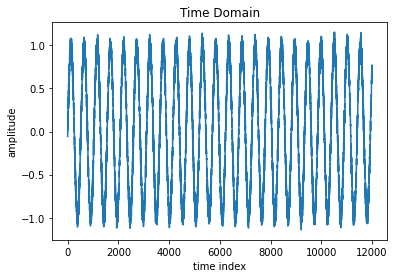

In [11]:
#plot example wave
plt.plot(example_wave)
plt.xlabel('time index')
plt.ylabel('amplitude')
plt.title('Time Domain')

Text(0.5, 1.0, 'Frequency Domain')

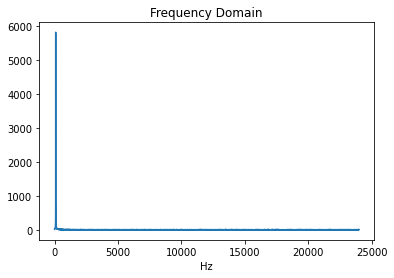

In [5]:
#perform a fast fourier transform to transform into the frequency domain
#found the following website to make things clear in python/matplab
##  https://pythontic.com/visualization/signals/fouriertransform_fft
##  https://www.mathworks.com/help/signal/ug/practical-introduction-to-frequency-domain-analysis.html
example_freq_dom = np.fft.fft(example_wave,n = len(example_wave))

example_freq_dom = example_freq_dom[range(int(len(example_wave)/2))] 


tpCount     = len(example_wave)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/sr

frequencies = values/timePeriod

plt.plot(frequencies, abs(example_freq_dom))
plt.xlabel('Hz')
plt.title('Frequency Domain')

Text(0.5, 1.0, 'Frequency Domain')

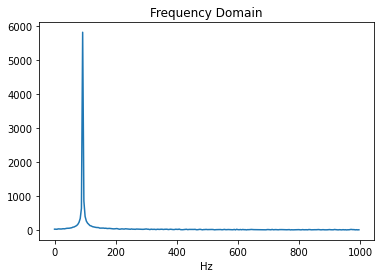

In [6]:
#Look at the frequency domain up to some reasonable frequency

indexes = frequencies<1000
plt.plot(frequencies[indexes], abs(example_freq_dom)[indexes])
plt.xlabel('Hz')
plt.title('Frequency Domain')

In [7]:
print(frequencies[:100]) #resolution of frequency domain will increase when we increase the time period of the chunks...

#i.e. jumps in frequency domain will be equal to 1/time period of chunk. So if we want to demonstrate a discrepency between 92 and 96, 
#we need time length of the chunk to be 1/4 unfortunately...

[  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100. 104. 108.
 112. 116. 120. 124. 128. 132. 136. 140. 144. 148. 152. 156. 160. 164.
 168. 172. 176. 180. 184. 188. 192. 196. 200. 204. 208. 212. 216. 220.
 224. 228. 232. 236. 240. 244. 248. 252. 256. 260. 264. 268. 272. 276.
 280. 284. 288. 292. 296. 300. 304. 308. 312. 316. 320. 324. 328. 332.
 336. 340. 344. 348. 352. 356. 360. 364. 368. 372. 376. 380. 384. 388.
 392. 396.]


In [8]:
abs(example_freq_dom)[indexes]

array([2.37600678e+01, 2.35114489e+01, 2.11243094e+01, 3.22834304e+01,
       3.03510744e+01, 2.82191074e+01, 2.98656219e+01, 3.72981601e+01,
       3.28788929e+01, 4.11470241e+01, 4.87995111e+01, 4.95833358e+01,
       5.17862828e+01, 5.75397649e+01, 6.53132830e+01, 8.20794402e+01,
       8.86362919e+01, 1.07709933e+02, 1.27934208e+02, 1.62876646e+02,
       2.24697260e+02, 3.36579015e+02, 6.39811477e+02, 5.82939917e+03,
       8.54654692e+02, 3.99083806e+02, 2.63444166e+02, 2.02287020e+02,
       1.64895454e+02, 1.29048217e+02, 1.18729399e+02, 9.84987362e+01,
       9.00060978e+01, 8.40110728e+01, 7.46173003e+01, 7.13037242e+01,
       7.01171557e+01, 5.46215145e+01, 5.49279909e+01, 5.52106205e+01,
       5.62192771e+01, 4.88096799e+01, 5.20144082e+01, 4.27277159e+01,
       4.35034728e+01, 4.65946329e+01, 4.04345265e+01, 3.75595713e+01,
       3.28483076e+01, 3.33825127e+01, 3.91542207e+01, 4.16315298e+01,
       3.29749165e+01, 2.25268753e+01, 2.60340756e+01, 3.29498040e+01,
      

In [9]:
#checking if the peak matches the frequency at which our example wave was generated
frequencies[np.argmax(abs(example_freq_dom))]

92.0